# Outlier detection using IQR:
    -> this method is used when the data is skewd.

![alt text](<Screenshot 2024-04-20 111050.png>)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('placement.csv')

In [5]:
df.shape

(1000, 3)

In [6]:
df.sample(5)

,cgpa,placement_exam_marks,placed
101,6.48,26.0,1
211,7.36,14.0,0
868,7.33,36.0,0
839,6.44,24.0,1
96,7.09,28.0,1


C:\Users\hp\AppData\Local\Temp\ipykernel_13656\4050638009.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\hp\AppData\Local\Temp\ipykernel_13656\4050638009.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

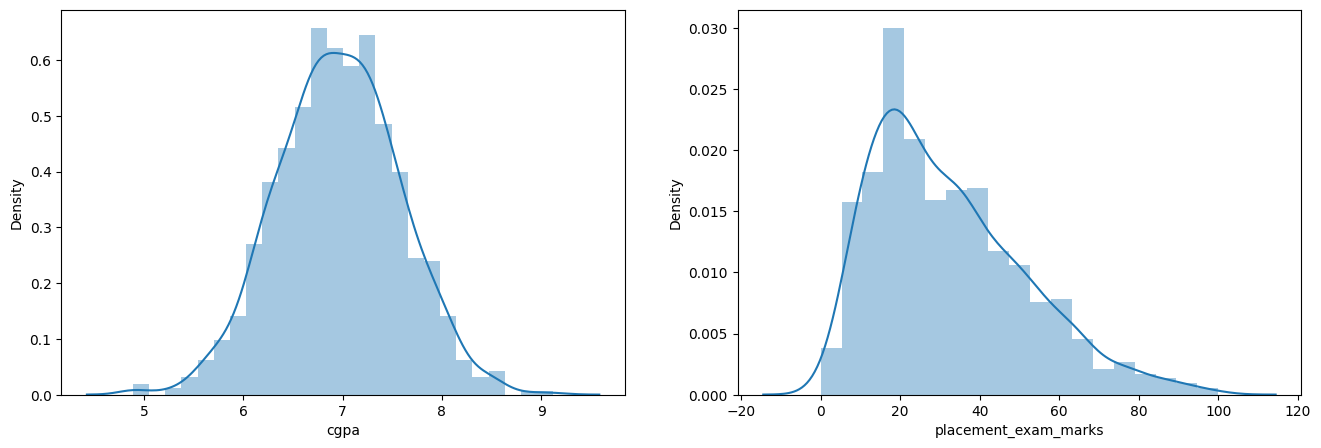

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)

sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

In [10]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [11]:
df['cgpa'].skew()

-0.014529938929314918

In [9]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

<Axes: ylabel='placement_exam_marks'>

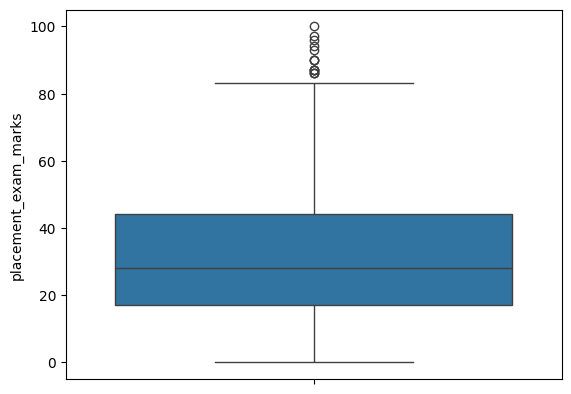

In [13]:
sns.boxplot(df['placement_exam_marks'])

In [14]:
# finding the IQR
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [15]:
percentile75

44.0

In [16]:
iqr=percentile75-percentile25

In [17]:
iqr

27.0

In [21]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr


In [22]:
upper_limit

84.5

In [23]:
lower_limit

-23.5

# Finding the Outlier

In [24]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [25]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


# Trimming

In [26]:
new_df=df[df['placement_exam_marks']<upper_limit]

In [27]:
new_df.shape

(985, 3)

C:\Users\hp\AppData\Local\Temp\ipykernel_13656\3540356298.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\hp\AppData\Local\Temp\ipykernel_13656\3540356298.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


<Axes: ylabel='placement_exam_marks'>

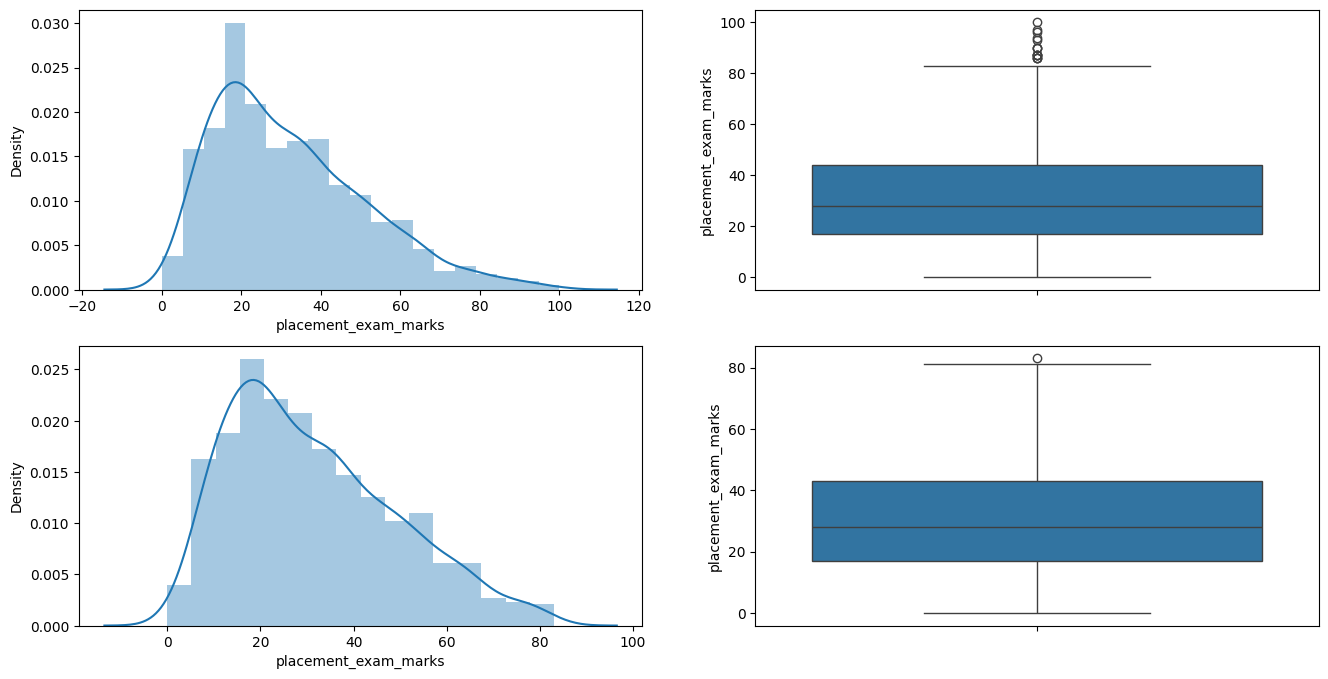

In [28]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

In [30]:
new_df_cap=df.copy()
new_df_cap['placement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks']>upper_limit,upper_limit,
    np.where(
        new_df_cap['placement_exam_marks']<lower_limit,lower_limit,
        new_df_cap['placement_exam_marks']
    )
)


In [32]:
new_df_cap.shape

(1000, 3)

C:\Users\hp\AppData\Local\Temp\ipykernel_13656\714437434.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['placement_exam_marks'])
C:\Users\hp\AppData\Local\Temp\ipykernel_13656\714437434.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

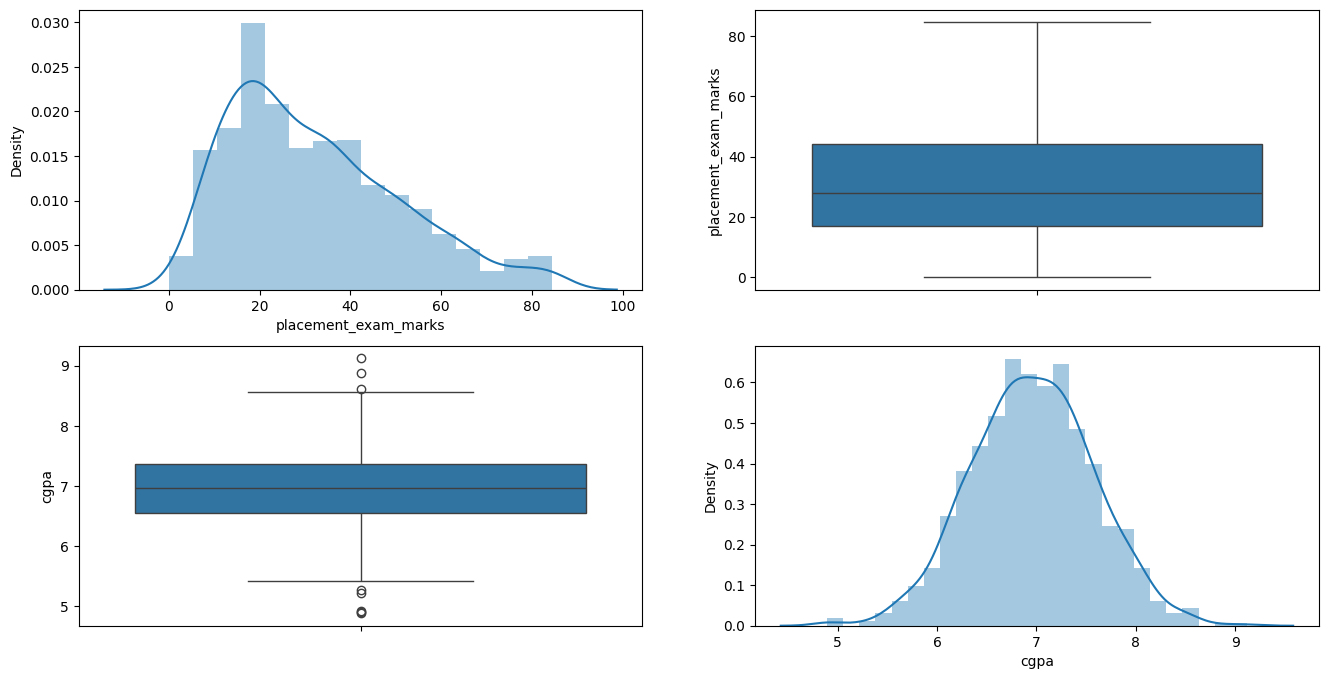

In [35]:
# comparing
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,3)
sns.boxplot(new_df_cap['cgpa'])

plt.subplot(2,2,4)
sns.distplot(new_df_cap['cgpa'])